# Homework 5 : WeatherPy using Openweathermap API and Citipy

### Analysis
**Latitude vs. Max Temperature:** There is a strong correlation of high temperatures in cities closer to the equator.                                 
**Humidity % vs. Latitude:** Moderate-weak correlation. Cities closest to the equator has slightly more humid weather.                                         
**Cloudiness(%) vs. Latitude:** No correlation.                               
**Wind Speed (mph) vs. Latitude:** No correlation.  


**Caveat:** Due to API retrieving current weather data witin a small time window  and sample cities are global; therefore, weather ranges due to time-of-day differences are not taken into account. For example, noon temperature in a city may be materially different than midnight temperature in the same city.

In [74]:
import openweathermapy.core as ow
from citipy import citipy as cp
import pandas as pd
import numpy as np
import random
import requests as req
import json
import matplotlib.pyplot as plt
import seaborn as sns
import time

%matplotlib inline

In [75]:
# Save config information.
api_key = "bfe8624363d9fae0c73d21055be1bfe8"  #primary api key
#api_key = "25bc90a1196e6f153eece0bc0b0fc9eb" #alternate api key
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = url + "appid=" + api_key + "&units=" + units + "&q="            

### Generate Random Coordinates

In [76]:
# Create dictionary of random coordinates; testing shows that range of 1500 will give <800 unique cities from Citipy
lat = []
lon = []
random_coords = {'Latitude': lat,'Longitude': lon}
for i in range(0,2400): 
    ran_lat = random.uniform(-90, 90)
    lat.append(ran_lat)  
    ran_lon = random.uniform(-180,180)
    lon.append(ran_lon)

In [77]:
# Check number of coordinates
len(random_coords['Latitude'])

2400

In [78]:
#Create dataframe for coordinates
df = pd.DataFrame(random_coords)
df.head(3)

,Latitude,Longitude
0,-67.447698,19.416710
1,-36.889349,-95.742530
2,87.321334,-152.922071


In [79]:
# Create additional colums for City, Temperature (F), Humidity (%), Cloudiness (%), Wind Speed (mph)
df['City'] = ""
df['Country'] = ""
df['Temperature (F)'] = ""
df['Humidity (%)'] = ""
df['Cloudiness (%)'] = ""
df['Wind Speed (mph)'] = ""
df.head(2)

,Latitude,Longitude,City,Country,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,-67.447698,19.41671,,,,,,
1,-36.889349,-95.74253,,,,,,


### Generate Cities from Random Coordinates

In [80]:
# Loop through coordinates in df with Citipy to return cities
#row_count = 1
for index, row in df.iterrows():
   
    city = cp.nearest_city((row["Latitude"]), (row["Longitude"]))
    return_city = city.city_name
    return_country = city.country_code
    
    df.set_value(index, "City", return_city)
    df.set_value(index, "Country", return_country) 
     
    # Print log to ensure loop is working correctly
    #print("Now retrieving city # " + str(row_count) + " " + return_city + ", " + return_country)
    #row_count += 1 
    
#df.head(3)

In [81]:
# Check number of unique (non-repeating) cities were generated
len(df["City"].unique())

847

In [82]:
# Visual check of duplicated cities vs unique values above
#df.sort_values("City", inplace=True)
mask=df["City"].duplicated()
df[mask].head()
#len(df[mask])

,Latitude,Longitude,City,Country,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
19,40.845048,168.147968,nikolskoye,ru,,,,
21,-76.804482,20.107428,bredasdorp,za,,,,
25,-34.808234,-89.929824,lebu,cl,,,,
27,-27.806410,12.492736,luderitz,na,,,,
41,-77.265254,-130.727429,rikitea,pf,,,,


In [83]:
# There are alot of duplicates since Citipy tries to match to random coords to nearest city
# Drop duplicates and check that results count is same as unique and reset index numbers
df.drop_duplicates(subset = ["City"], keep = 'first', inplace=True) 
df.reset_index(drop=True, inplace=True)
len(df)

847

### Perform API Calls, Print Log, and Set Data to Dataframe

In [84]:
# Create function to perform API calls, then retrieve, set, and print data for each city
def retrieve_set_data():
    print("Now retrieving Set: %s, Record: %s, City: %s: %s" %
          (str(set_count), str(index), city.title(), target_url))
            
    weather_data = [req.get(target_url).json()]
    return_temp = weather_data[0]["main"]["temp_max"]
    return_humid = weather_data[0]["main"]["humidity"]
    return_cloud = weather_data[0]["clouds"]["all"]
    return_wind = weather_data[0]["wind"]["speed"]
    return_lat = weather_data[0]["coord"]["lat"]
    return_lon = weather_data[0]["coord"]["lon"]
    
    df.set_value(index, "Temperature (F)", return_temp)
    df.set_value(index, "Humidity (%)", return_humid) 
    df.set_value(index, "Cloudiness (%)", return_cloud)
    df.set_value(index, "Wind Speed (mph)", return_wind)         
    df.set_value(index, "Latitude", return_lat)
    df.set_value(index, "Longitude", return_lon)

In [85]:
# Loop through all cities using OpenWeatherMap to return weather info
# Need to overwrite random-generated coords with actual coords since plotting random-generated lat not same as city lat
row_count = 1
set_count = 1
for index, row in df.iterrows():
    
    city = row["City"]
    target_url = (query_url + city)
    
    # Print log to ensure loop is working correctly
    # Retreive in increments include timer to mitigate exceeding API limits
    if row_count<50:
        retrieve_set_data()
        row_count += 1 
        
    else:
        retrieve_set_data()
        row_count = 1
        set_count += 1
        time.sleep(15)

Now retrieving Set: 1, Record: 0, City: Bredasdorp: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=bredasdorp
Now retrieving Set: 1, Record: 1, City: Lebu: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=lebu
Now retrieving Set: 1, Record: 2, City: Barrow: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=barrow
Now retrieving Set: 1, Record: 3, City: Nikolskoye: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=nikolskoye
Now retrieving Set: 1, Record: 4, City: Albany: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=albany
Now retrieving Set: 1, Record: 5, City: Bluff: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=bluff
Now retrieving Set: 1, Record: 6, City: De

Now retrieving Set: 2, Record: 51, City: Kapaa: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=kapaa
Now retrieving Set: 2, Record: 52, City: Mattru: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=mattru
Now retrieving Set: 2, Record: 53, City: Kattivakkam: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=kattivakkam
Now retrieving Set: 2, Record: 54, City: Necochea: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=necochea
Now retrieving Set: 2, Record: 55, City: Illoqqortoormiut: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=illoqqortoormiut
Now retrieving Set: 2, Record: 56, City: Te Anau: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=te anau
Now retrievi

Now retrieving Set: 3, Record: 102, City: Kenai: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=kenai
Now retrieving Set: 3, Record: 103, City: Cayenne: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=cayenne
Now retrieving Set: 3, Record: 104, City: Barentsburg: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=barentsburg
Now retrieving Set: 3, Record: 105, City: Kruisfontein: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=kruisfontein
Now retrieving Set: 3, Record: 106, City: Ilulissat: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=ilulissat
Now retrieving Set: 3, Record: 107, City: Dhidhdhoo: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=dhidhdhoo
Now re

Now retrieving Set: 4, Record: 152, City: Fayetteville: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=fayetteville
Now retrieving Set: 4, Record: 153, City: Upernavik: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=upernavik
Now retrieving Set: 4, Record: 154, City: Burica: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=burica
Now retrieving Set: 4, Record: 155, City: Belushya Guba: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=belushya guba
Now retrieving Set: 4, Record: 156, City: Morehead: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=morehead
Now retrieving Set: 4, Record: 157, City: Ulagan: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=ulagan
Now 

Now retrieving Set: 5, Record: 203, City: Zhaotong: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=zhaotong
Now retrieving Set: 5, Record: 204, City: Vaitupu: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=vaitupu
Now retrieving Set: 5, Record: 205, City: Mehamn: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=mehamn
Now retrieving Set: 5, Record: 206, City: Tecoanapa: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=tecoanapa
Now retrieving Set: 5, Record: 207, City: Xining: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=xining
Now retrieving Set: 5, Record: 208, City: North Bend: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=north bend
Now retrieving Set: 

Now retrieving Set: 6, Record: 253, City: Port Lincoln: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=port lincoln
Now retrieving Set: 6, Record: 254, City: Najran: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=najran
Now retrieving Set: 6, Record: 255, City: Camacha: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=camacha
Now retrieving Set: 6, Record: 256, City: Itamaraju: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=itamaraju
Now retrieving Set: 6, Record: 257, City: Gillette: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=gillette
Now retrieving Set: 6, Record: 258, City: Shahrud: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=shahrud
Now retrieving

Now retrieving Set: 7, Record: 303, City: Kushmurun: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=kushmurun
Now retrieving Set: 7, Record: 304, City: Manggar: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=manggar
Now retrieving Set: 7, Record: 305, City: Lamar: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=lamar
Now retrieving Set: 7, Record: 306, City: Aktau: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=aktau
Now retrieving Set: 7, Record: 307, City: Grand Gaube: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=grand gaube
Now retrieving Set: 7, Record: 308, City: Turangi: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=turangi
Now retrieving Set: 7, R

Now retrieving Set: 8, Record: 354, City: Hithadhoo: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=hithadhoo
Now retrieving Set: 8, Record: 355, City: Lorengau: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=lorengau
Now retrieving Set: 8, Record: 356, City: Lyndon: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=lyndon
Now retrieving Set: 8, Record: 357, City: Egvekinot: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=egvekinot
Now retrieving Set: 8, Record: 358, City: Kidal: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=kidal
Now retrieving Set: 8, Record: 359, City: Sandnessjoen: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=sandnessjoen
Now retrieving

Now retrieving Set: 9, Record: 404, City: Torrington: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=torrington
Now retrieving Set: 9, Record: 405, City: Monster: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=monster
Now retrieving Set: 9, Record: 406, City: Dauphin: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=dauphin
Now retrieving Set: 9, Record: 407, City: Mali Idos: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=mali idos
Now retrieving Set: 9, Record: 408, City: Harer: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=harer
Now retrieving Set: 9, Record: 409, City: Nicolas Bravo: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=nicolas bravo
Now retrie

Now retrieving Set: 10, Record: 454, City: Annau: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=annau
Now retrieving Set: 10, Record: 455, City: Crepy-En-Valois: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=crepy-en-valois
Now retrieving Set: 10, Record: 456, City: Belaya Gora: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=belaya gora
Now retrieving Set: 10, Record: 457, City: Goderich: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=goderich
Now retrieving Set: 10, Record: 458, City: Drayton Valley: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=drayton valley
Now retrieving Set: 10, Record: 459, City: Kahului: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imper

Now retrieving Set: 11, Record: 504, City: Inongo: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=inongo
Now retrieving Set: 11, Record: 505, City: Shitanjing: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=shitanjing
Now retrieving Set: 11, Record: 506, City: Wanning: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=wanning
Now retrieving Set: 11, Record: 507, City: Amalapuram: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=amalapuram
Now retrieving Set: 11, Record: 508, City: Luanda: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=luanda
Now retrieving Set: 11, Record: 509, City: Nouadhibou: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=nouadhibou
Now retr

Now retrieving Set: 12, Record: 554, City: Nyurba: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=nyurba
Now retrieving Set: 12, Record: 555, City: Irbit: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=irbit
Now retrieving Set: 12, Record: 556, City: Champerico: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=champerico
Now retrieving Set: 12, Record: 557, City: San Antonio: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=san antonio
Now retrieving Set: 12, Record: 558, City: Gorin: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=gorin
Now retrieving Set: 12, Record: 559, City: Itaituba: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=itaituba
Now retrieving S

Now retrieving Set: 13, Record: 604, City: Gubkinskiy: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=gubkinskiy
Now retrieving Set: 13, Record: 605, City: Beyla: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=beyla
Now retrieving Set: 13, Record: 606, City: Lichinga: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=lichinga
Now retrieving Set: 13, Record: 607, City: George Town: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=george town
Now retrieving Set: 13, Record: 608, City: Shelburne: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=shelburne
Now retrieving Set: 13, Record: 609, City: Sangmelima: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=sangmelima


Now retrieving Set: 14, Record: 654, City: Riyadh: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=riyadh
Now retrieving Set: 14, Record: 655, City: Amga: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=amga
Now retrieving Set: 14, Record: 656, City: Katobu: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=katobu
Now retrieving Set: 14, Record: 657, City: Nueva Helvecia: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=nueva helvecia
Now retrieving Set: 14, Record: 658, City: Jintur: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=jintur
Now retrieving Set: 14, Record: 659, City: Repelon: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=repelon
Now retrieving Set: 

Now retrieving Set: 15, Record: 704, City: Viligili: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=viligili
Now retrieving Set: 15, Record: 705, City: Pontes E Lacerda: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=pontes e lacerda
Now retrieving Set: 15, Record: 706, City: Talnakh: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=talnakh
Now retrieving Set: 15, Record: 707, City: Manado: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=manado
Now retrieving Set: 15, Record: 708, City: Udachnyy: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=udachnyy
Now retrieving Set: 15, Record: 709, City: Roros: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=roros
Now re

Now retrieving Set: 16, Record: 755, City: Tenenkou: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=tenenkou
Now retrieving Set: 16, Record: 756, City: Maracaibo: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=maracaibo
Now retrieving Set: 16, Record: 757, City: Gazli: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=gazli
Now retrieving Set: 16, Record: 758, City: Volksrust: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=volksrust
Now retrieving Set: 16, Record: 759, City: Cordoba: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=cordoba
Now retrieving Set: 16, Record: 760, City: Chinsali: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=chinsali
Now retrieving

Now retrieving Set: 17, Record: 805, City: Cloquet: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=cloquet
Now retrieving Set: 17, Record: 806, City: Cahors: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=cahors
Now retrieving Set: 17, Record: 807, City: Ulladulla: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=ulladulla
Now retrieving Set: 17, Record: 808, City: Harper: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=harper
Now retrieving Set: 17, Record: 809, City: Clearlake: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=clearlake
Now retrieving Set: 17, Record: 810, City: Orlovskiy: http://api.openweathermap.org/data/2.5/weather?appid=bfe8624363d9fae0c73d21055be1bfe8&units=imperial&q=orlovskiy
Now retrieving

In [30]:
df.head()

,Latitude,Longitude,City,Country,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,71.29,-156.79,barrow,us,37.4,93,90,16.11
1,40.97,-117.74,winnemucca,us,64.4,42,1,3.36
2,-34.42,19.23,hermanus,za,49.51,100,100,2.37
3,-25.02,46.97,taolanaro,mg,66.2,88,40,6.06
4,71.97,102.50,khatanga,ru,40.15,88,56,16.02


### Save Dataframe to CSV File

In [86]:
df.to_csv("random_city_weather_data.csv", encoding="utf-8", index=False)

### Latitude vs. Temperature Plot

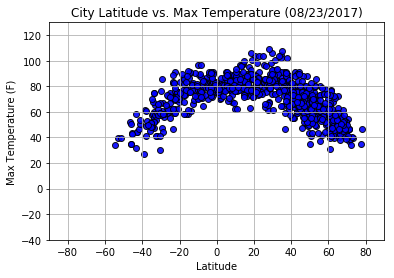

In [87]:
# Build a scatter plot for each data type
plt.scatter(df["Latitude"], 
            df["Temperature (F)"], color="blue",
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.9)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (08/23/2017)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-90, 90])
plt.ylim([-40, 130])

# Save the figure
plt.savefig("latitude_vs_temp.png")

# Show plot
plt.show()

### Latitude vs. Humidity Plot

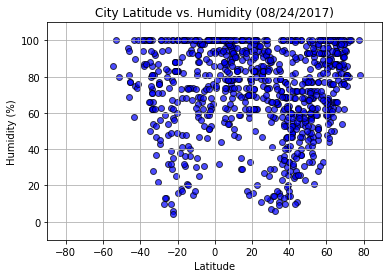

In [94]:
# Build a scatter plot for each data type
plt.scatter(df["Latitude"], 
            df["Humidity (%)"], color="blue",
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (08/24/2017)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-90, 90])
plt.ylim([-10, 110])

# Save the figure
plt.savefig("latitude_vs_humidity.png")

# Show plot
plt.show()

### Latitude vs. Cloudiness Plot

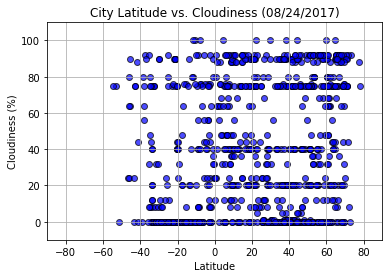

In [95]:
# Build a scatter plot for each data type
plt.scatter(df["Latitude"], 
            df["Cloudiness (%)"], color="blue",
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (08/24/2017)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-90, 90])
plt.ylim([-10, 110])

# Save the figure
plt.savefig("latitude_vs_cloudiness.png")

# Show plot
plt.show()

### Latitude vs. Wind Speed Plot

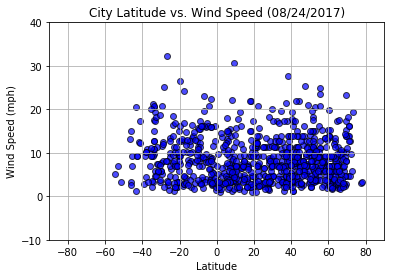

In [100]:
# Build a scatter plot for each data type
plt.scatter(df["Latitude"], 
            df["Wind Speed (mph)"], color="blue",
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (08/24/2017)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-90, 90])
plt.ylim([-10, 40])

# Save the figure
plt.savefig("latitude_vs_wind.png")

# Show plot
plt.show()

In [ ]:
# plt = sns.stripplot(x="Latitude", y="Wind Speed (mph)", data=df, jitter=True);
# plt.grid(True)
# plt.xlim([-90, 90])
# plt.ylim([-10, 40])